In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install paddlepaddle-gpu -q
%pip install paddleocr -q
%pip install --quiet vietocr
%pip install paddlepaddle -q
#%pip install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio==0.10.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html -q

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from paddleocr import PaddleOCR

import torch

from vietocr.vietocr.tool.predictor import Predictor
from vietocr.vietocr.tool.config import Cfg

from paddleocr import PaddleOCR, draw_ocr


import difflib
import re
import math
import copy

# Paddle

In [ ]:
ocr = PaddleOCR(lang='en')

[2023/01/18 05:44:31] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

In [ ]:
# Specifying output path and font path.
out_path = '/content/drive/MyDrive/Linh Tinh'
#font = '/content/drive/MyDrive/Test_Paddle/PaddleOCR/doc/fonts/latin.ttf'
font = '/content/drive/MyDrive/Test_Paddle/PaddleOCR/doc/fonts/latin.ttf'

In [ ]:
def save_ocr(img_path, out_path, result, font):
  figure(figsize=(50, 50), dpi=80)
  save_path = os.path.join(out_path, img_path.split('/')[-1] + 'output')

  image = cv2.imread(img_path)

  result = result[:][:][0]

  boxes = [line[0] for line in result]
  txts = [line[1][0] for line in result]
  scores = [line[1][1] for line in result]

  im_show = draw_ocr(image, boxes, txts, scores, font_path=font)

  #cv2.imwrite(save_path, im_show)

  img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
  #plt.imshow(img)
  display_image_in_actual_size(img)

def display_image_in_actual_size(im_data):

    dpi = 600
    #im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [ ]:
img_path = '/content/IMG_1501.jpeg'
result = ocr.ocr(img_path)

[2023/01/18 05:44:32] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/01/18 05:44:33] ppocr DEBUG: dt_boxes num : 32, elapse : 0.5356731414794922
[2023/01/18 05:44:36] ppocr DEBUG: rec_res num  : 32, elapse : 3.35356068611145


<Figure size 4000x4000 with 0 Axes>

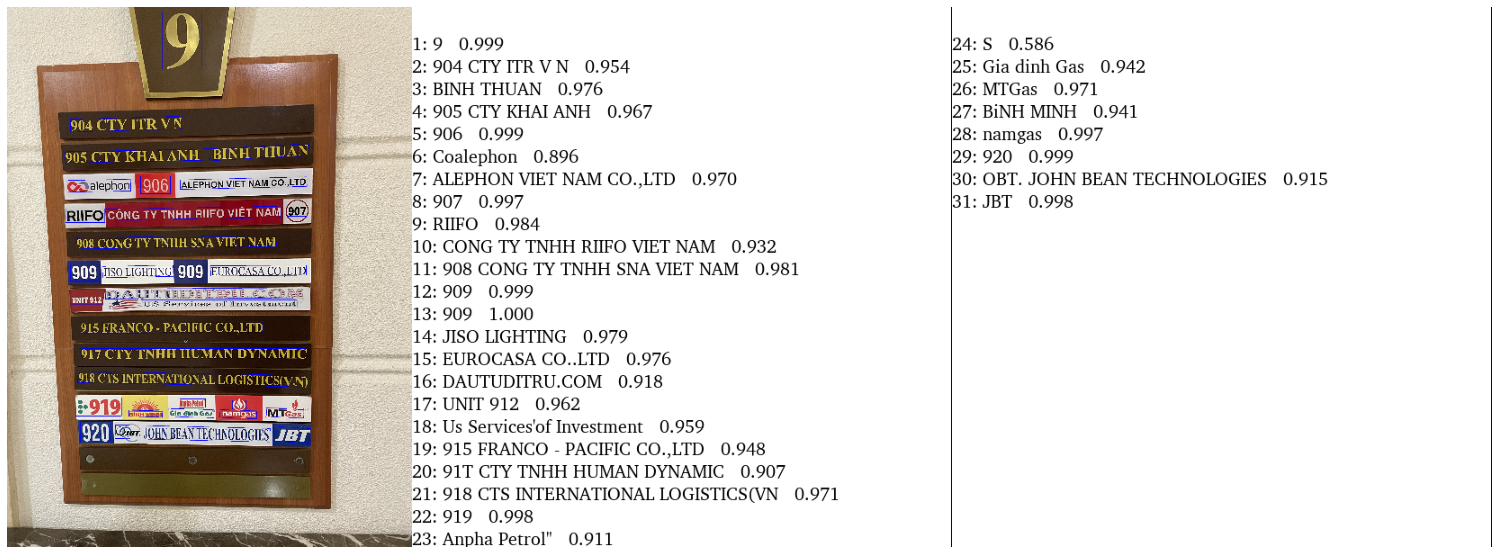

In [ ]:
save_ocr(img_path, out_path, result, font)

# Paddle + VietOCR

In [11]:
config = Cfg.load_config_from_name('vgg_seq2seq')

In [10]:
#config['weights'] = './weights/transformerocr.pth'
#config['cnn']['pretrained']=False

config['weights'] = 'https://vocr.vn/data/vietocr/vgg_seq2seq.pth'
config['pretrain'] = 'https://vocr.vn/data/vietocr/vgg_seq2seq.pth'

detector = Predictor(config)

Model weight /tmp/vgg_seq2seq.pth exsits. Ignore download!


In [12]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 4000,
  'iters': 100000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': None},
 'dataset': {'name': 'data',
  'data_root': './img/',
  'train_annotation': 'annotation_train.txt',
  'valid_annotation': 'annotation_val_small.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'dataloader': {'num_workers': 3, 'pin_memory': True}

In [13]:
def display_image_in_actual_size(im_data, dpi=600):
    #im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [8]:
!wget -O test.jpg https://media-cdn-v2.laodong.vn/Storage/NewsPortal/2022/7/7/1065050/De2.jpg

--2023-01-22 12:27:18--  https://media-cdn-v2.laodong.vn/Storage/NewsPortal/2022/7/7/1065050/De2.jpg
Resolving media-cdn-v2.laodong.vn (media-cdn-v2.laodong.vn)... 122.10.142.222, 128.1.50.189, 128.1.50.190, ...
Connecting to media-cdn-v2.laodong.vn (media-cdn-v2.laodong.vn)|122.10.142.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344746 (337K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 336.67K   472KB/s    in 0.7s    

2023-01-22 12:27:20 (472 KB/s) - ‘test.jpg’ saved [344746/344746]



[2023/01/22 12:29:29] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

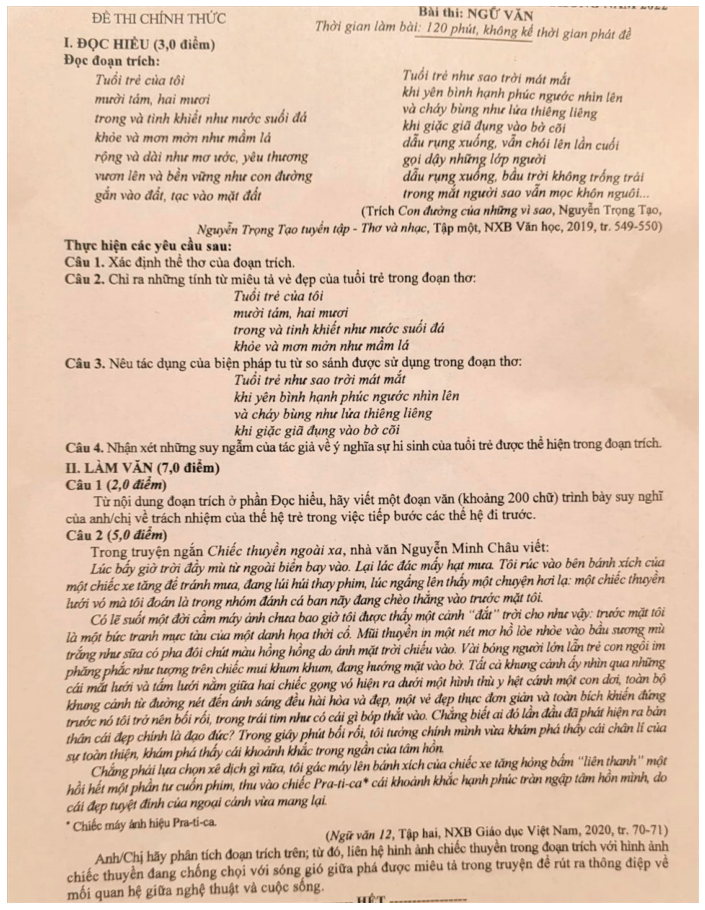

In [14]:
img_path = '/content/test.jpg'
img = cv2.imread(img_path)
#img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

Paddle = PaddleOCR(use_angle_cls=False, lang="vi", use_gpu=True)
result = Paddle.ocr(img_path, cls=False, det=True, rec=False)
result = result[:][:][0]

# Create Boxes
boxes = []
for line in result:
  boxes.append([[int(line[0][0]), int(line[0][1])], [int(line[2][0]), int(line[2][1])]])

boxes = boxes[::-1]

EXPEND = 5
for box in boxes:
  box[0][0] = box[0][0] - EXPEND
  box[0][1] = box[0][1] - EXPEND
  box[1][0] = box[1][0] + EXPEND
  box[1][1] = box[1][1] + EXPEND


texts = []
for box in boxes:
  cropped_image = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]

  try:
    cropped_image = Image.fromarray(cropped_image)
  except:
    continue

  #rec_result = Paddle.ocr(cropped_image, cls=True, det=False, rec=True)
  rec_result = detector.predict(cropped_image)

  text = rec_result#[0]

  texts.append(text)
  print(text)

display_image_in_actual_size(img, 100)

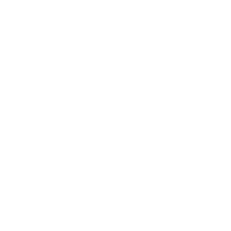

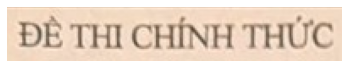

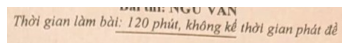

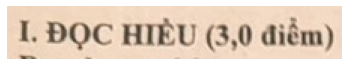

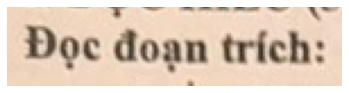

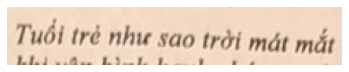

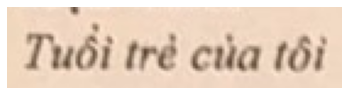

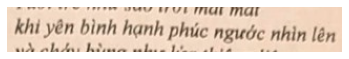

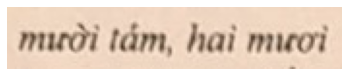

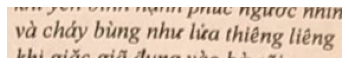

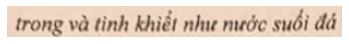

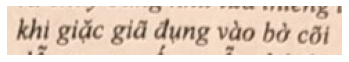

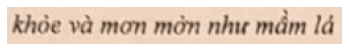

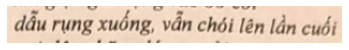

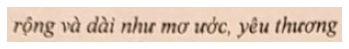

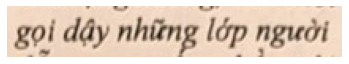

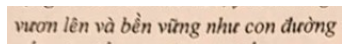

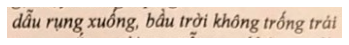

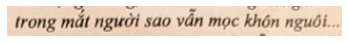

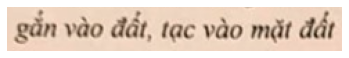

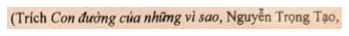

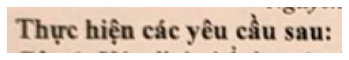

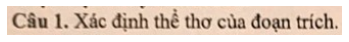

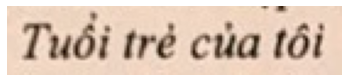

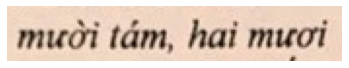

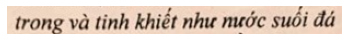

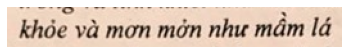

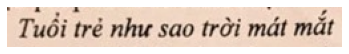

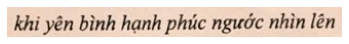

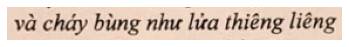

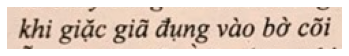

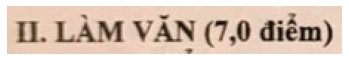

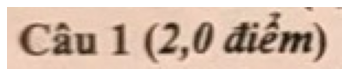

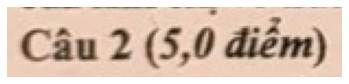

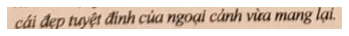

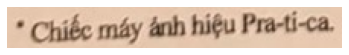

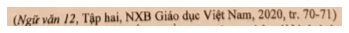

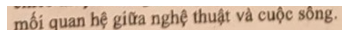

In [15]:
def process(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image)

count = 0
for box in boxes:
  cropped_image = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
  try:
    process(cropped_image)
  except:
    pass
  #count += 1
  # if count == 10:
  #   break

In [ ]:
output = ""
for text in texts:
  output += text + " "

output

In [ ]:
# For images having only 1 line
img = Image.open(img_path)
rec_result = detector.predict(img)

text = rec_result#[0]

print(text)

03


[2023/01/19 08:53:57] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

<Figure size 4000x4000 with 0 Axes>

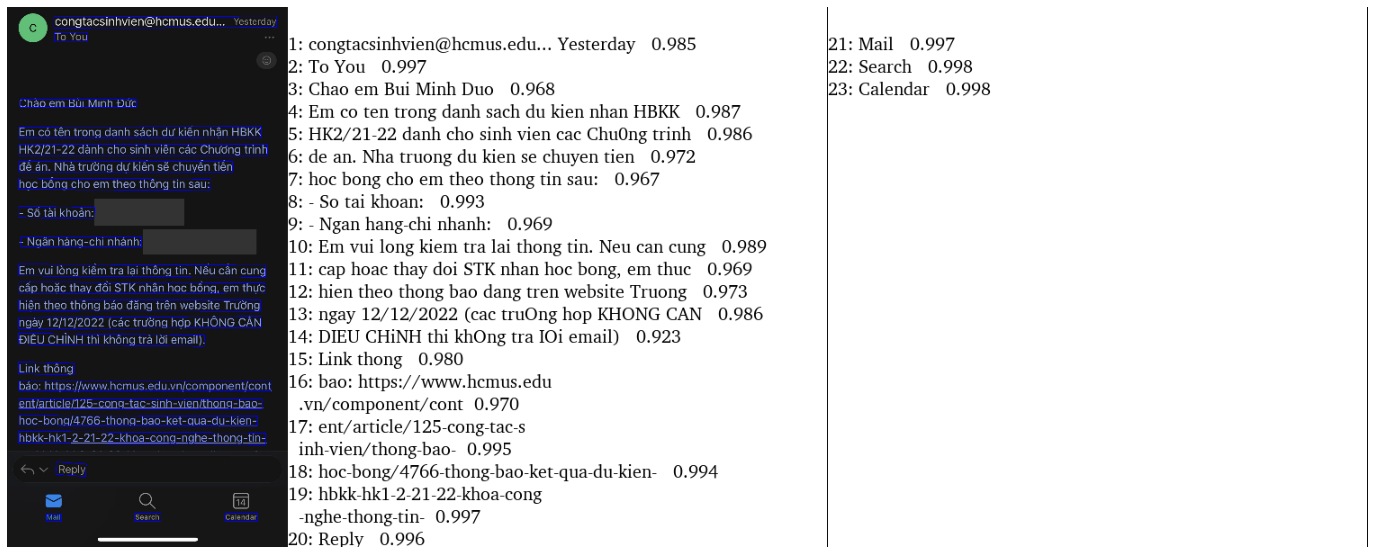

In [ ]:
img = cv2.imread(img_path)

Paddle = PaddleOCR(use_angle_cls=True, lang="en", use_gpu=True)
result = Paddle.ocr(img_path)#, cls=False, det=True, rec=False)

save_ocr(img_path, out_path, result, font)

In [ ]:
!wget -O test_align.png https://www.samontab.com/web/wp-content/uploads/2020/11/gray-2-717x1024.png

--2023-01-19 16:47:09--  https://www.samontab.com/web/wp-content/uploads/2020/11/gray-2-717x1024.png
Resolving www.samontab.com (www.samontab.com)... 173.236.182.76
Connecting to www.samontab.com (www.samontab.com)|173.236.182.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197220 (193K) [image/png]
Saving to: ‘test_align.png’

test_align.png      100%[===================>] 192.60K   220KB/s    in 0.9s    

2023-01-19 16:47:10 (220 KB/s) - ‘test_align.png’ saved [197220/197220]



In [ ]:
image = cv2.imread("/content/test_align.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

otsu_thresh, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

kernel_size = 4
ksize=(kernel_size, kernel_size)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
thresh_filtered = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

nonZeroCoordinates = cv2.findNonZero(thresh_filtered)
imageCopy = image.copy()
for pt in nonZeroCoordinates:
  imageCopy = cv2.circle(imageCopy, (pt[0][0], pt[0][1]), 1, (255, 0, 0))


box = cv2.minAreaRect(nonZeroCoordinates)

boxPts = cv2.boxPoints(box)
for i in range(4):
  # pt1 = (np.float32(boxPts[i][0]), np.float32(boxPts[i][1]))
  # pt2 = (np.float32((boxPts[(i+1)%4][0])), np.float32(boxPts[(i+1)%4][1]))
  pt1 = (int(boxPts[i][0]), int(boxPts[i][1]))
  pt2 = (int(boxPts[(i+1)%4][0]), int(boxPts[(i+1)%4][1]))

  color = (0, 255, 0)
  thickness = 2
  cv2.line(imageCopy, pt1, pt2, color, thickness, cv2.LINE_AA)


948.4286499023438


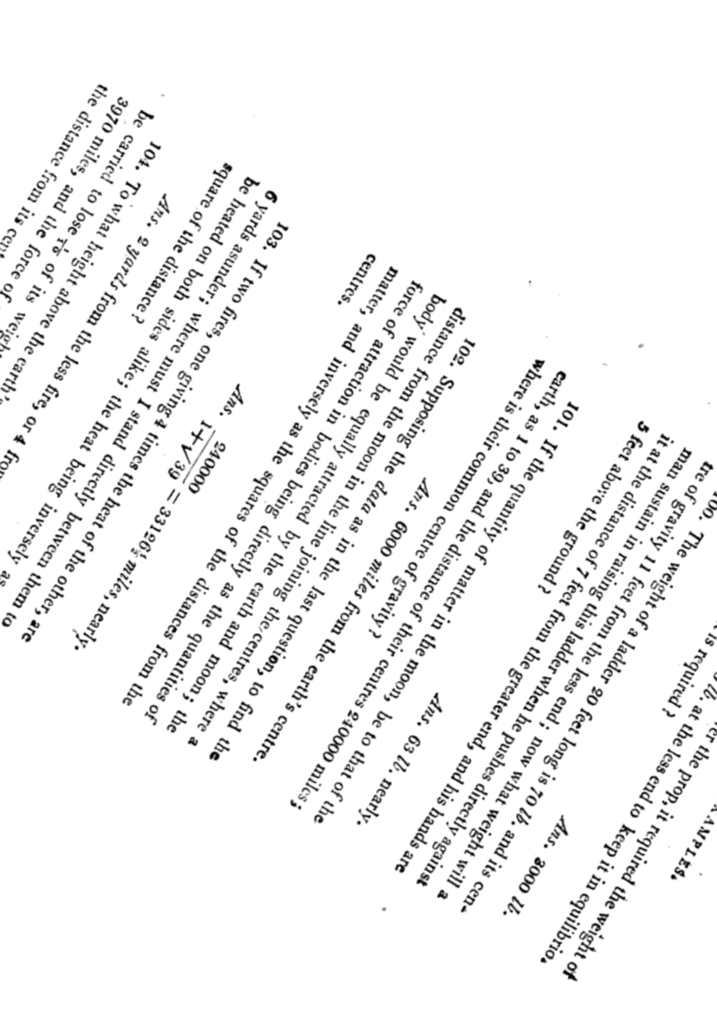

In [ ]:
angle = box[1][0]
print(angle)
if(angle < -45):
  angle = 90 + angle

h, w, c = image.shape
scale = 1.
center = (w/2., h/2.)
M = cv2.getRotationMatrix2D(center, angle, scale)
rotated = image.copy()
res = cv2.warpAffine(image, M, (w, h), rotated, cv2.INTER_CUBIC, cv2.BORDER_REPLICATE )
cv2_imshow(res)

In [ ]:
# Python program to explain cv2.line() method

# importing cv2
import cv2
from google.colab.patches import cv2_imshow

# path
path = '/content/test_align.png'

# Reading an image in default mode
image = cv2.imread(path)

# Window name in which image is displayed
window_name = 'Image'

# Start coordinate, here (0, 0)
# represents the top left corner of image
start_point = (0, 0)

# End coordinate, here (250, 250)
# represents the bottom right corner of image
end_point = (250, 250)

# Green color in BGR
color = (0, 255, 0)

# Line thickness of 9 px
thickness = 9

# Using cv2.line() method
# Draw a diagonal green line with thickness of 9 px
image = cv2.line(image, start_point, end_point, color, thickness=2)

# Displaying the image
cv2_imshow(image)


# Image Alignment

In [ ]:
!wget -O aligned.jpg https://images.viblo.asia/c0133636-37fa-442f-9d6d-b2c00dc5ca98.jpg

--2023-01-19 16:27:57--  https://images.viblo.asia/c0133636-37fa-442f-9d6d-b2c00dc5ca98.jpg
Resolving images.viblo.asia (images.viblo.asia)... 172.67.134.232, 104.21.6.150, 2606:4700:3033::ac43:86e8, ...
Connecting to images.viblo.asia (images.viblo.asia)|172.67.134.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47688 (47K) [image/jpeg]
Saving to: ‘aligned.jpg’

aligned.jpg         100%[===================>]  46.57K  --.-KB/s    in 0.005s  

2023-01-19 16:27:58 (8.37 MB/s) - ‘aligned.jpg’ saved [47688/47688]



In [ ]:
import cv2
import numpy as np
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

im2 = cv2.imread('/content/template.jpg')
im1 = cv2.imread('/content/input.jpg')

im1Gray = cv2.cvtColor(img_need_aligned, cv2.COLOR_BGR2GRAY)
im2Gray = cv2.cvtColor(img_template, cv2.COLOR_BGR2GRAY)


orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

# Match features
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)
  
# Sort matches by score
#matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]

# Draw top matches
imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
cv2.imwrite("matches.jpg", imMatches)
  
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use homography
height, width = im2Gray.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))

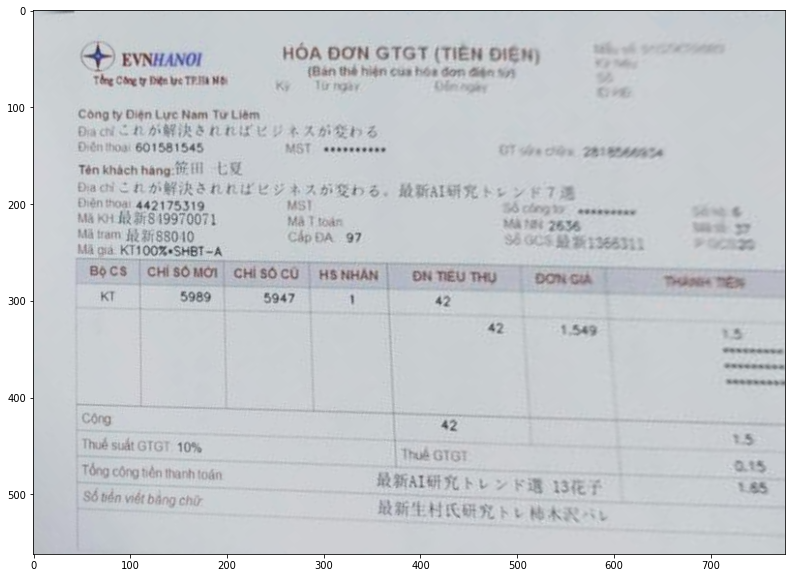

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(im1Reg)

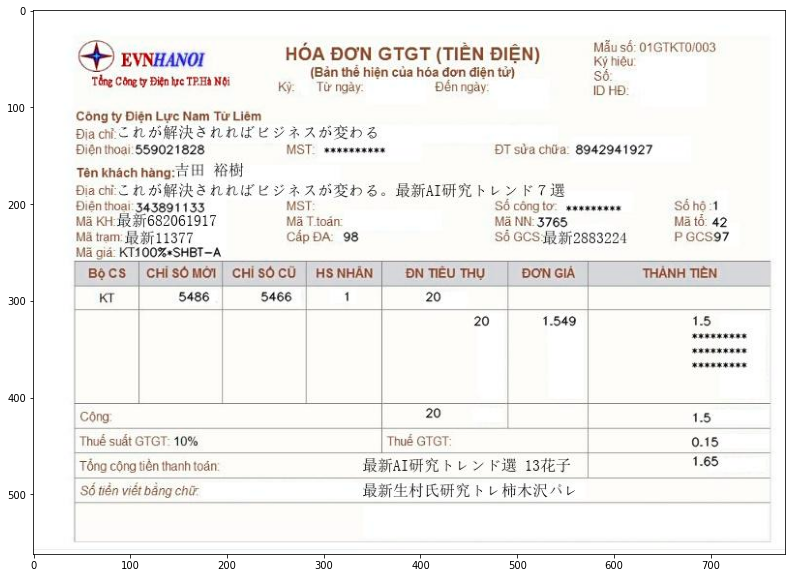

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(im2)

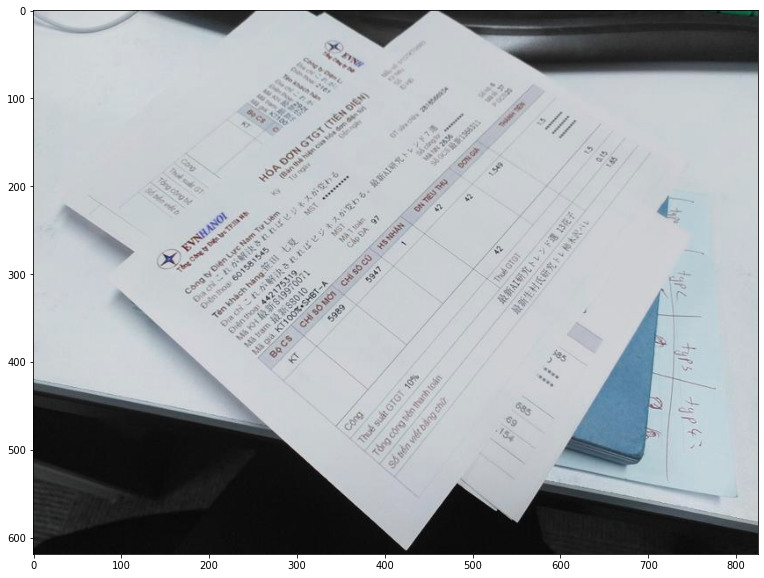

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(im1)